# <font color='blue'>**0. Python**

## 0-1. 패키지 설치하기

In [ ]:
!pip install [패키지명]

# <font color='blue'>**1. Pandas**

## 1-1. csv파일 불러오기

In [ ]:
import pandas as pd
pd.read_csv('example.csv',sep=',')

## 1-2. 결측치 채우기

In [ ]:
df.fillna('채울값', inplace=True)

## 1-3. 결측치가 있는 행 삭제하기

In [ ]:
df.dropna(axis=0, inplace=True)

## 1-4. 특정 행 삭제하기

In [ ]:
df.drop(삭제할 행 index, axis=0)

## 1-5. 특정 컬럼 삭제하기

In [ ]:
df.drop(삭제할 컬럼명, axis=1)
# 삭제할 컬럼이 여러 개일 경우 리스트 사용
df.drop([컬럼명1,컬럼명2] axis=1)

## 1-6 더미 변수 타입으로 변환(One-hot encoding)

In [ ]:
pd.get_dummies(data=df, columns=['컬럼명'])

# <font color='blue'>**2. Scikit-learn**

## 2-1. 데이터셋 분할하기

In [ ]:
from sklearn.model_selection import train_test_split

# Feature데이터와 label데이터가 분리되어 있는 경우
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Feature데이터와 label데이터가 하나의 데이터프레임에 같이 있는 경우
train_x, test_x, train_y, test_y = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

# Feature데이터와 label데이터가 하나의 데이터프레임에 같이 있는 경우, (레이블까지 고려하여) 데이터셋 균등하게 나누기
train_x, test_x, train_y, test_y = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, stratify=df['label'], random_state=42)

# 데이터셋 분할 후, 분할된 데이터셋 확인
train_x.shape, test_x.shape, train_y.shape, test_y.shape

## 2-2. 데이터 정규화 - MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## 2-3. 데이터 정규화 - StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## 2-4. 머신러닝 모델 - 분류 : 랜덤포레스트 분류기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=123)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-4-1 머신러닝 모델 - 성능 측정(accuracy, precision, recall, f1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

print(accuracy_score(test_y, pred_y))
print(precision_score(test_y, pred_y))
print(recall_score(test_y, pred_y))
print(f1_score(test_y, pred_y))

## 2-4-2 머신러닝 모델 - confusion_matrix를 heatmap으로 출력하기

In [ ]:
data = confusion_matrix(test_y, pred_y)

# seaborn으로  그려보자.
sns.heatmap(data, annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## 2-4-3 머신러닝 모델 - classification_report로 성능 확인하기

In [ ]:
from sklearn.metrics import classification_report

classification_report(test_y, pred_y, target_names=target_names)

## 2-5. 머신러닝 모델 - 분류 : 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-6. 머신러닝 모델 - 분류 : K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-7. 머신러닝 모델 - 분류 : DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(randon_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-8. 머신러닝 모델 - 분류 : SGDClassifier

In [ ]:
model = SGDClassifier(random_state=123, learning_rate='optimal')
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-9. 머신러닝 모델 - 분류 : xgboost

### xgboost 패키지 설치

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=3, random_state=42) 
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-10. 머신러닝 모델 - 분류 : LGBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=3, random_state=42) 
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-11. 머신러닝 모델 - 회귀 : LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-12. 머신러닝 모델 - 회귀 : RandomForestRegressor

In [ ]:
from sklearn.linear_model import RandomForestRegressor

# train_y가 Pandas 데이터프레임이거나, Pandas Series인 경우
# 다차원 배열을 1차원 배열로 만들기
train_y = train_y.to_numpy().flatten()

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-13. 머신러닝 모델 - 회귀 : GradientBoostingRegressor

In [ ]:
# train_y가 Pandas 데이터프레임이거나, Pandas Series인 경우
# 다차원 배열을 1차원 배열로 만들기
train_y = train_y.to_numpy().flatten()

model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-14. 머신러닝 모델 - 회귀 : XGBRegressor

In [ ]:
from xgboost import XGBRegressor as xgb

# train_y가 Pandas 데이터프레임이거나, Pandas Series인 경우
# 다차원 배열을 1차원 배열로 만들기
train_y = train_y.to_numpy().flatten()

model = XGBRegressor(n_estimators=100,gamma=1,reg_lambda=5, reg_alpha=5,random_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

## 2-15. 머신러닝 모델 - 회귀 : Voting Ensemble Model

In [ ]:
from sklearn.linear_model import LinearRegression as lr
from xgboost import XGBRegressor as xgb
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grb
from sklearn.ensemble import VotingRegressor

import joblib
import time

model_list=[lr(), rfr(), grb(), xgb()]

# train_y가 Pandas 데이터프레임이거나, Pandas Series인 경우
# 다차원 배열을 1차원 배열로 만들기
train_y = train_y.to_numpy().flatten()

# 개별 모델들을 학습한 후에 모델을 저장한다.
model_result = []
for i in range(len(model_list)):
    model = model_list[i]
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    model_result.append(model)

# 개별 모델들을 Tuple타입으로 리스트에 넣고
voting_models = [
    ('linear_reg', model_rslt[0]), 
    ('randForest', model_rslt[1]), 
    ('gradBoost', model_rslt[2]), 
    ('xgboost', model_rslt[3])
]

# VotingRegressor를 하나의 모델을 학습 하듯이 학습하고 추론한다.
voting_regressor = VotingRegressor(voting_models, n_jobs=-1)
voting_regressor.fit(train_x, train_y)
pred_y = voting_regressor.predict(test_x) 

# <font color='blue'>3. Matplotlib & Seaborn

## 시각화를 위한 데이터 가져오기

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')

In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 3-1. scatterplot

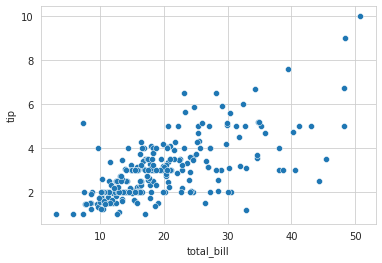

In [4]:
sns.set_style('whitegrid')
# data에 대상 데이터프레임명을 설정하고, 
# x, y의 컬럼명을 각각 설정한다.
sns.scatterplot(data=df, x='total_bill', y='tip')

## 3-2. boxplot

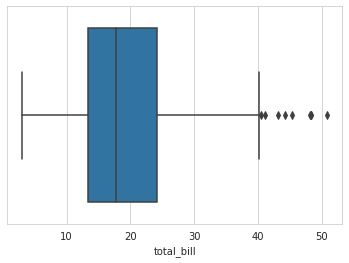

In [5]:
sns.boxplot(x=df['total_bill'])

## 3-3. coutplot

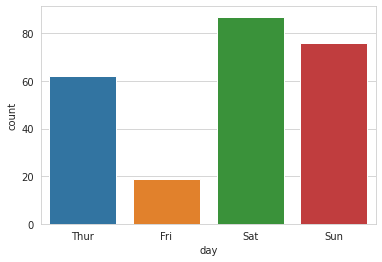

In [6]:
sns.countplot(x=df['day'])

## 3-4. histplot

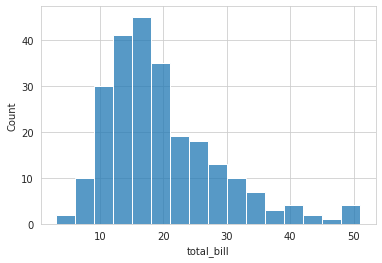

In [7]:
sns.histplot(data=df, x="total_bill", binwidth=3)

## 3-5. kdeplot

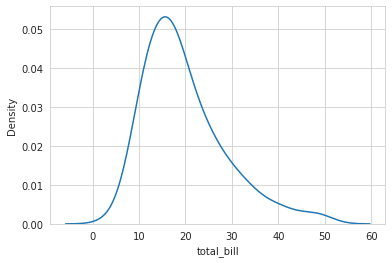

In [8]:
sns.kdeplot(data=df, x="total_bill")

# <font color='blue'>**4. Tensorflow(Keras)**

## 4-1. 딥러닝 모델 - 심층신경망 만들기(회귀 모델)

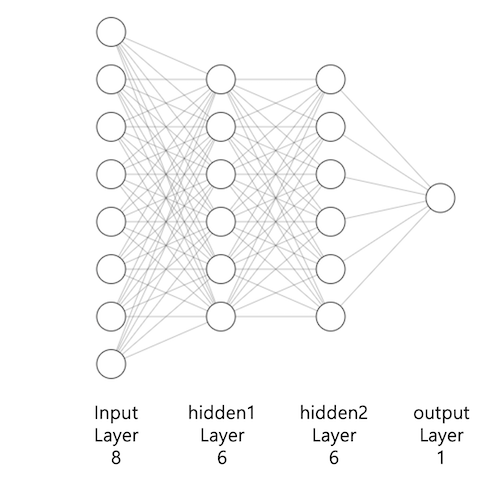

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

set_seed(100)

# 여기서 col_num는 데이터프레임의 col의 갯수를 의미
# col_num가 8이라면
col_num = train_x.shape[1]

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(col_num,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])      
model.summary()

## 4-2. 딥러닝 모델 - 심층신경망 만들기(이진 분류 모델)


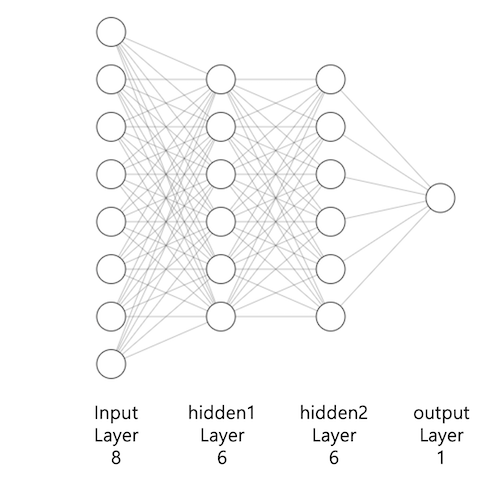

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

set_seed(100)

# col_num이 8이라면
col_num = train_x.shape[1]

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(col_num,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])      
model.summary()

## 4-3. 딥러닝 모델 - 심층신경망 만들기(다중 분류 모델)

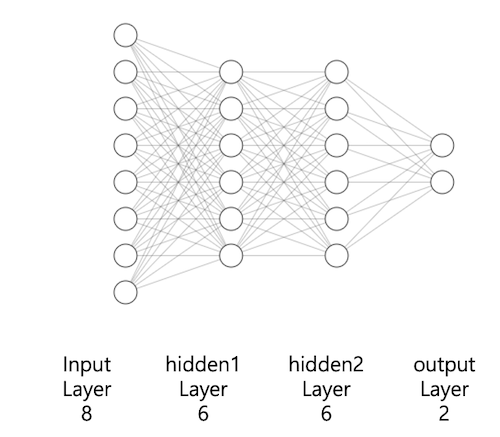

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

set_seed(100)
class_num = 2

# col_num가 8이라면
col_num = train_x.shape[1]

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(col_num,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(class_num, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])      
model.summary() 

## 4-4. 딥러닝 모델 - 콜백 함수 설정

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# val_loss 모니터링해서 성능이 5epoch동안 val_loss가 낮아지지 않으면 조기 종료
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# fit()함수의 callbacks에 전달할 리스트
callbacks = [early_stop, check_point]

## 4-5. 딥러닝 모델 - 학습

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), verbose=1, callbacks=callbacks)

## 4-6. 딥러닝 모델 - 성능 평가 - loss 그래프 그리기

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()